In [ ]:
import numpy as np
import random

In [ ]:
class Entrance:
  def __init__(self, initialPeople = 100):
    self.quantity = initialPeople

  def enterEntrance(self, amount, source):
    self.quantity += amount
    print(f"{amount} people entered the entrance from {source}")

  def leaveEntrance(self, amount, destination):
    self.quantity -= amount
    print(f"{amount} people left entrance to {destination}")

  def externalArrival(self):
    arrivals = random.randint(5, 20)
    self.quantity += arrivals
    print(f"{arrivals} new people arrived at Entrance from outside")

  def externalDeparture(self):
    if self.quantity > 0:
      departures = min(random.randint(5, 20), self.quantity)  # Cannot remove more than available
      self.quantity -= departures
      print(f"{departures} people left Entrance to outside")

  def reportEntrance(self):
    print(f"currently {self.quantity} in Entrance")

In [ ]:
class Metro:
  def __init__(self, initialPeople = 100):
    self.quantity = initialPeople

  def enterMetro(self, amount, source):
    self.quantity += amount
    print(f"{amount} people entered the Metro from {source}")

  def leaveMetro(self, amount, destination):
    self.quantity -= amount
    print(f"{amount} people left Metro to {destination}")

  def externalArrival(self):
    arrivals = random.randint(5, 20)
    self.quantity += arrivals
    print(f"{arrivals} new people arrived at Metro from outside")

  def externalDeparture(self):
    if self.quantity > 0:
      departures = min(random.randint(5, 20), self.quantity)  # Cannot remove more than available
      self.quantity -= departures
      print(f"{departures} people left Metro to outside")

  def reportMetro(self):
    print(f"currently {self.quantity} in Metro")

In [ ]:
class Cercanias:
  def __init__(self, initialPeople = 100):
    self.quantity = initialPeople

  def enterCercanias(self, amount, source):
    self.quantity += amount
    print(f"{amount} people entered the Cercanias from {source}")

  def leaveCercanias(self, amount, destination):
    self.quantity -= amount
    print(f"{amount} people left Cercanias to {destination}")

  def externalArrival(self):
    arrivals = random.randint(5, 20)
    self.quantity += arrivals
    print(f"{arrivals} new people arrived at Cercanias from outside")

  def externalDeparture(self):
    if self.quantity > 0:
      departures = min(random.randint(5, 20), self.quantity)  # Cannot remove more than available
      self.quantity -= departures
      print(f"{departures} people left Cercanias to outside")

  def reportCercanias(self):
    print(f"currently {self.quantity} in Cercanias")

In [ ]:
import random
import numpy as np  # for using poisson if needed

class PeopleGenerator:
  def __init__(self, arrival_rate=10):
    self.arrival_rate = arrival_rate  # Expected average arrivals per cycle

  def generate(self):
    # You could also use Poisson for more realistic modeling
    return random.randint(int(0.5 * self.arrival_rate), int(1.5 * self.arrival_rate))


In [ ]:
class PeopleSink:
  def __init__(self, departure_rate=10):
    self.departure_rate = departure_rate  # Expected average departures per cycle

  def drain(self, current_population):
    # Ensure we don’t remove more than available
    return min(random.randint(int(0.5 * self.departure_rate), int(1.5 * self.departure_rate)), current_population)


In [ ]:
import matplotlib.pyplot as plt

# Add this before starting the simulation
metro_history = []
entrance_history = []
cercanias_history = []

class peopleFlowSimulation:
  def __init__(self, metro, cercanias, entrance,
               metro_gen=None, cercanias_gen=None, entrance_gen=None,
               metro_sink=None, cercanias_sink=None, entrance_sink=None,
               cycles=10):

    self.metro = metro
    self.cercanias = cercanias
    self.entrance = entrance
    self.cycles = cycles

    self.metro_gen = metro_gen or PeopleGenerator(15)
    self.cercanias_gen = cercanias_gen or PeopleGenerator(15)
    self.entrance_gen = entrance_gen or PeopleGenerator(15)

    self.metro_sink = metro_sink or PeopleSink(10)
    self.cercanias_sink = cercanias_sink or PeopleSink(10)
    self.entrance_sink = entrance_sink or PeopleSink(10)

    # Add tracking lists
    self.metro_history = []
    self.cercanias_history = []
    self.entrance_history = []

  def flow(self):

    for i in range(self.cycles):

      print(f"\n ========== Simulation Cycle {i} ========== \n")

      #Movements from outside the system in
      print("************************************************")
      metro_arrivals = self.metro_gen.generate()
      entrance_arrivals = self.entrance_gen.generate()
      cercanias_arrivals = self.cercanias_gen.generate()

      self.metro.enterMetro(metro_arrivals, "Outside")
      self.entrance.enterEntrance(entrance_arrivals, "Outside")
      self.cercanias.enterCercanias(cercanias_arrivals, "Outside")
      print("************************************************")

      #probability definitions (same as before)...

      metroToMetro = int(self.metro.quantity * 0.45)
      metroToCercanias = int(self.metro.quantity * 0.25)
      metroToEntrance = int(self.metro.quantity * 0.30)

      entranceToEntrance = int(self.entrance.quantity * 0.03)
      entranceToMetro = int(self.entrance.quantity * 0.776)
      entranceToCercanias = int(self.entrance.quantity * 0.194)

      cercaniasToCercanias = int(self.cercanias.quantity * 0.02)
      cercaniasToMetro = int(self.cercanias.quantity * 0.588)
      cercaniasToEntrance = int(self.cercanias.quantity * 0.392)

      # Movement logic (same as your current implementation)...

      if self.metro.quantity >= metroToMetro:
        print(f"{metroToMetro} people stayed in Metro")
      if self.metro.quantity >= metroToCercanias:
        self.metro.leaveMetro(metroToCercanias, "Cercanias")
        self.cercanias.enterCercanias(metroToCercanias, "Metro")
      if self.metro.quantity >= metroToEntrance:
        self.metro.leaveMetro(metroToEntrance, "Entrance")
        self.entrance.enterEntrance(metroToEntrance, "Metro")

      if self.entrance.quantity >= entranceToEntrance:
        print(f"{entranceToEntrance} people stayed in Entrance")
      if self.entrance.quantity >= entranceToMetro:
        self.entrance.leaveEntrance(entranceToMetro, "Metro")
        self.metro.enterMetro(entranceToMetro, "Entrance")
      if self.entrance.quantity >= entranceToCercanias:
        self.entrance.leaveEntrance(entranceToCercanias, "Cercanias")
        self.cercanias.enterCercanias(entranceToCercanias, "Entrance")

      if self.cercanias.quantity >= cercaniasToCercanias:
        print(f"{cercaniasToCercanias} people stayed in Cercanias")
      if self.cercanias.quantity >= cercaniasToMetro:
        self.cercanias.leaveCercanias(cercaniasToMetro, "Metro")
        self.metro.enterMetro(cercaniasToMetro, "Cercanias")
      if self.cercanias.quantity >= cercaniasToEntrance:
        self.cercanias.leaveCercanias(cercaniasToEntrance, "Entrance")
        self.entrance.enterEntrance(cercaniasToEntrance, "Cercanias")

      # External departures
      print("************************************************")
      metro_departures = self.metro_sink.drain(self.metro.quantity)
      entrance_departures = self.entrance_sink.drain(self.entrance.quantity)
      cercanias_departures = self.cercanias_sink.drain(self.cercanias.quantity)

      self.metro.leaveMetro(metro_departures, "Outside")
      self.entrance.leaveEntrance(entrance_departures, "Outside")
      self.cercanias.leaveCercanias(cercanias_departures, "Outside")
      print("************************************************")

      # Save populations for plotting
      self.metro_history.append(self.metro.quantity)
      self.cercanias_history.append(self.cercanias.quantity)
      self.entrance_history.append(self.entrance.quantity)

      # Report
      print("===========================================")
      self.metro.reportMetro()
      self.cercanias.reportCercanias()
      self.entrance.reportEntrance()
      print("===========================================")

  def plot_results(self):
    plt.figure(figsize=(12, 6))
    plt.plot(self.metro_history, label="Metro", color='blue')
    plt.plot(self.cercanias_history, label="Cercanias", color='green')
    plt.plot(self.entrance_history, label="Entrance", color='orange')
    plt.title("Population at Sol Station Over Time")
    plt.xlabel("Simulation Cycle")
    plt.ylabel("Number of People")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



 ========== Simulation Cycle 0 ========== 

************************************************
18 people entered the Metro from Outside
6 people entered the entrance from Outside
13 people entered the Cercanias from Outside
************************************************
53 people stayed in Metro
29 people left Metro to Cercanias
29 people entered the Cercanias from Metro
35 people left Metro to Entrance
35 people entered the entrance from Metro
3 people stayed in Entrance
82 people left entrance to Metro
82 people entered the Metro from Entrance
20 people left entrance to Cercanias
20 people entered the Cercanias from Entrance
2 people stayed in Cercanias
66 people left Cercanias to Metro
66 people entered the Metro from Cercanias
44 people left Cercanias to Entrance
44 people entered the entrance from Cercanias
************************************************
14 people left Metro to Outside
11 people left entrance to Outside
14 people left Cercanias to Outside
***********************

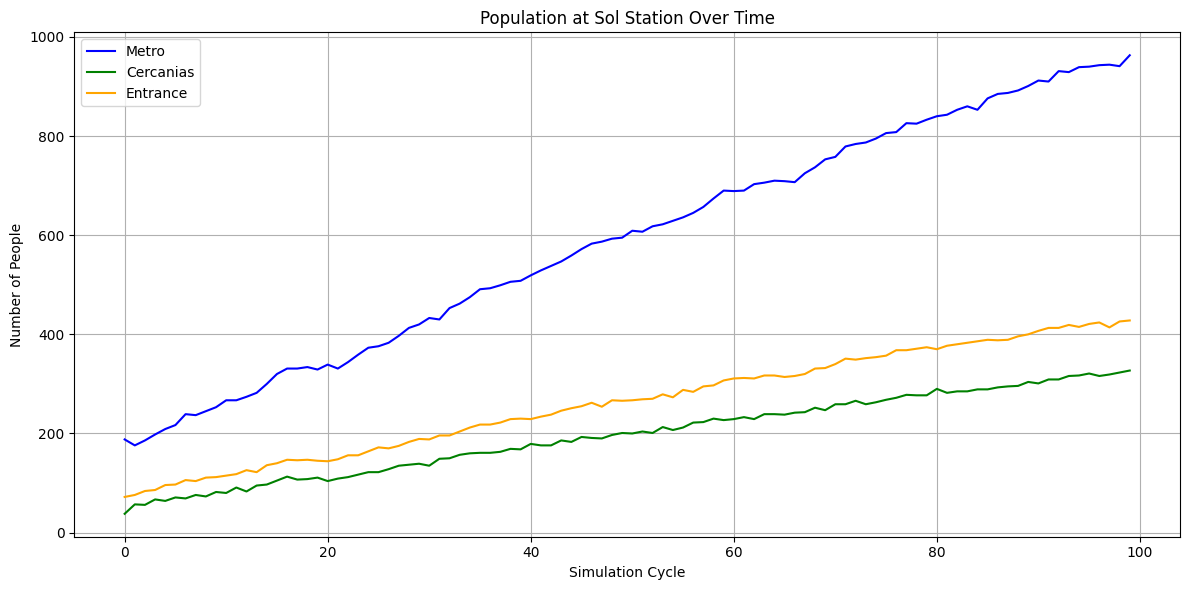

In [ ]:
metro1 = Metro(100)
entrance1 = Entrance(100)
cercanias1 = Cercanias(100)

metro_gen = PeopleGenerator(arrival_rate=20)
entrance_gen = PeopleGenerator(arrival_rate=10)
cercanias_gen = PeopleGenerator(arrival_rate=15)

metro_sink = PeopleSink(departure_rate=12)
entrance_sink = PeopleSink(departure_rate=8)
cercanias_sink = PeopleSink(departure_rate=10)

simulation1 = peopleFlowSimulation(
    metro1, cercanias1, entrance1,
    metro_gen, cercanias_gen, entrance_gen,
    metro_sink, cercanias_sink, entrance_sink,
    cycles=100
)

simulation1.flow()
simulation1.plot_results()